⚛️ 🚀 QISKIT FALL FEST  -- UNIVERSITY OF MELBOURNE  --  HACKATHON 🚀⚛️ 
====================================================================




### Basic Setup for Drawing Plots

Before we can get started, any plots in Python need to set up a few things. The most commonly used library for plotting is **Matplotlib**.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",
    context="notebook",
    palette="deep"
)

plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

---
---


### Hamiltonian Setup 1 - Lithium hydride (LiH)

In this step we generate the Hamiltonian for Lithium Hydride (LiH).  

👉 The focus of this hackathon is **not** on how to derive these Hamiltonians.  
If you’re curious, you can check out these resources:  
- [Tutorial: Obtaining the Qubit Hamiltonian for H2 and LiH](https://www.youtube.com/watch?v=2XEjrwWhr88)  
- [Tutorial: Molecular Hamiltonians with Qiskit Nature](https://qiskit.org/ecosystem/nature/tutorials/01_electronic_structure.html)  

Don’t worry too much about the details here –  *Treat the following code cell as a black box that gives us the Hamiltonian of LiH `LiH_H` to work with*. 

---
---



In [4]:
import numpy as np
import Helper
from qiskit.quantum_info import SparsePauliOp
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.second_q.mappers import JordanWignerMapper

In [5]:
# -----------------------------
# LiH Hamiltonian (6 qubits)
# -----------------------------
R = 2.2  # Angstrom bond distance
driver = PySCFDriver(atom=f"Li 0 0 0; H 0 0 {R}", basis="sto3g", charge=0, spin=0)
problem = driver.run()

# 2 electrons in 3 spatial orbitals -> 6 spin orbitals -> 6 qubits
problem = ActiveSpaceTransformer(num_electrons=2, num_spatial_orbitals=3, active_orbitals=[1,2,5]).transform(problem)

#Mapping to qubit Hamiltonian
mapper = JordanWignerMapper()
LiH = problem.hamiltonian.second_q_op()
Hq: SparsePauliOp = mapper.map(LiH)

#Add energy offset
E_consts = sum(problem.hamiltonian.constants.values())
I_str = "I" * Hq.num_qubits
H_shift = SparsePauliOp.from_list([(I_str, E_consts)])
LiH_H = Hq + H_shift


---
---

### ⚛️ Your Task: Designing the Ansatz

👉 What matters here:  
- The Hamiltonian encodes the chemistry.  
- **Your job is to design the ansatz.** The ansatz is basically your idea of how to solve the problem on a quantum computer.
- Don’t be afraid to experiment- **there’s no perfect ansatz**, only clever trade-offs and interesting ideas.

Different choices of Ansatz (layer depth, rotation types, entanglement pattern, parameter initialization, …) will lead to different results in accuracy, convergence speed, and runtime. You can always explore the dummy VQE below to experiment and get a feeling for the impact of different design choices as needed.

💡 *Tip:* Explore ansatz features that catch your interest—begin with something simple, then tweak and experiment your way forward. 
- Start simple: single-qubit rotations + one entangling layer.
- Increase depth and check if accuracy improves (and how runtime changes).
- Swap gate types and entanglement patterns to see their effect.
- Try a different initial state or smarter parameter initialization.
- Iterate: take a working scheme and refine it step by step.
- Explore Qiskit’s built-in ansatz circuits—then tweak them into your own.
---

### Useful Qiskit Ansatz Implementations

Qiskit comes with standard ansatz circuits you can try out, adapt, and use to explore their trade-offs:

- **EfficientSU2** (hardware-efficient ansatz with Rx/Ry rotations + entanglement)  
  [Docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.EfficientSU2.html)  

- **TwoLocal** (general template: choose rotation blocks + entanglement blocks)  
  [Docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html)  

- **UCCSD (Unitary Coupled Cluster with Singles and Doubles)** (a chemistry-inspired ansatz)
  [Tutorial](https://qiskit-community.github.io/qiskit-nature/howtos/vqe_ucc.html  )

- **RealAmplitudes** (very simple layered Rx ansatz)  
  [Docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html)

---

Keep in mind: **there is no unique optimal ansatz for this problem**. The design space is open, and creativity is part of the exploration. 🚀


---
---


In [6]:
###################
#---YOUR TURN-----#
###################

# You can copy the code from the Warm up example and switch to the LiH_H Hamiltonian to get started :) 

# ...



&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;









---
---

# Warm-up: The Variational Quantum Eigensolver (VQE)

Sure, this toy problem is simple enough to solve by hand. But the fun part is that we can picture the Hilbert space on the Bloch sphere—perfect for building intuition about ansatz behavior. 😊

Our Hamiltonian:
$\hat{H} =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}$.

The ground state of this Hamiltonian is $\ket{1}$, while the VQE starts from $\ket{0}$. Take a pen and paper, draw the Bloch sphere, and mark both states. The task of the VQE is then to move on the Bloch sphere from the initial state to the ground state.

---

### Prompts

1. **Run the baseline.**  
   Execute the code and get familiar with the outcome and what you see.

3. **Gate choice matters.**  
   Change the ansatz from an `Rx` gate to an `Rz` gate and run VQE again. Why is `Rz` a poor choice for this problem? Look at the Bloch sphere and mark the region that can be reached by varying the gate parameter. The ansatz essentially defines which parts of the Bloch sphere are accessible.

2. **Initial point matters.**  
   Change the initial point from `[0]` to `[π/2]`. Do you notice any difference? Think about where you start on the Bloch sphere if you initialize with π/2: you are already closer to the ground-state energy, so your initial guess is better and VQE can converge more easily.

4. **Add one more gate.**  
   Switch back to `Rx` and add an additional `Ry` with a new parameter. Do you see any differences of using just a single `Rx` gate compared to `Rx Ry`? With both gates you can reach essentially the entire Bloch sphere, but this also introduces more parameters to optimize...
---
---


In [8]:
import numpy as np
import time
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorEstimator as Estimator
#from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA

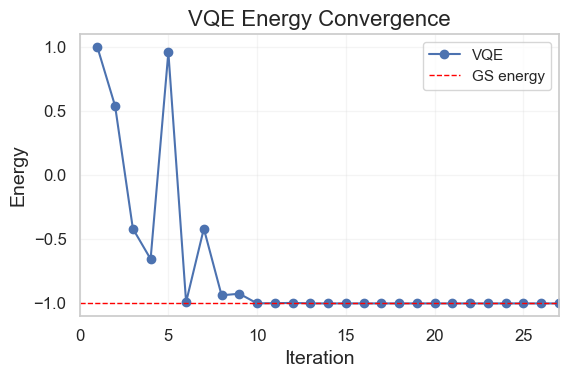

Final result
-------------------------------------------
E_answer   : -1.0
E_min      : -0.999999999973015
Error      : 2.6984969814236592e-11
Optimal parameters  : [3.14]
n_qubits: 1
n_params: 1
depth   : 1
VQE runtime: 0.12 seconds
Iteration steps: 27
Number of entangling gates: 0
-------------------------------------------
YOUR ANSATZ:


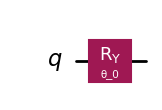

In [9]:
# -----------------------------
# Problem: H = 0.5 * Z (2-level)
# Ground energy is -0.5
# -----------------------------
H = SparsePauliOp.from_list([("Z", 1)])
nq = H.num_qubits
E_exact = float(np.linalg.eigvalsh(H.to_matrix()).min().real)

# -----------------------------
# Ansatz: 1 qubit, one parameter
# -----------------------------
n_layers = 1
params = [Parameter(f"θ_{l}") for l in range(n_layers)]
ans = QuantumCircuit(nq)
for l in range(n_layers):
    ans.ry(params[l], 0)

# -----------------------------
# Optimizer + VQE
# -----------------------------
opt = COBYLA(maxiter=50)

history = []
def store_history(eval_count, params, value, meta=None):
    history.append((eval_count, float(value)))

vqe = VQE(
    ansatz=ans,
    optimizer=opt,
    estimator=Estimator(),     
    initial_point=[0.0]*len(params),       
    callback=store_history
)

t0 = time.perf_counter()
res = vqe.compute_minimum_eigenvalue(H)
t1 = time.perf_counter()

# -----------------------------
# Plot convergence
# -----------------------------
iters   = [h[0] for h in history]
energies= [h[1] for h in history]

res, history, runtime = Helper.run_vqe(ansatz=ans, hamiltonian=H, maxiter = 200, optimizer=opt)
Helper.plot_vqe_results(res, history, H, ans, runtime)

print("YOUR ANSATZ:")
ans.draw(output="mpl")